## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
%matplotlib inline

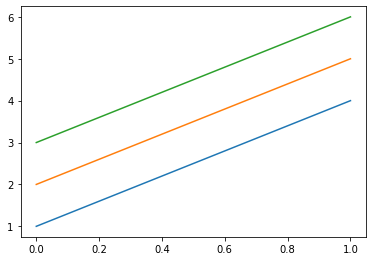

In [ ]:
f = plt.figure()
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
line1 = ax.plot([[1,2,3], [4,5,6]], label='График')


## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

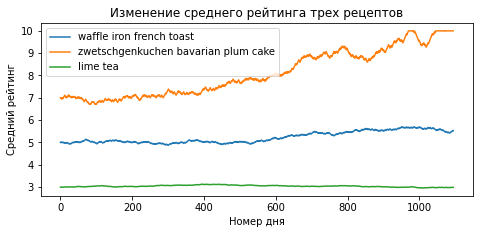

In [ ]:
data = np.load('/content/average_ratings.npy')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 0.6])
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
rec1 = ax.plot(data[0], label='waffle iron french toast')
rec2 = ax.plot(data[1], label='zwetschgenkuchen bavarian plum cake')
rec3 = ax.plot(data[2], label='lime tea')
ax.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


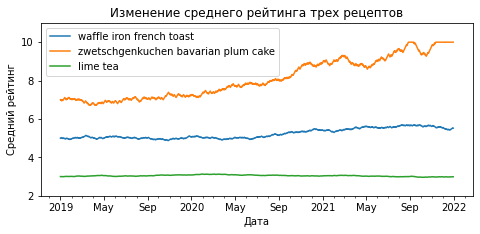

In [ ]:
from matplotlib.axis import Axis
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 0.6])
ax.set_ylim([2,11])
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

d = pd.date_range(start= '01.01.2019', end = '30.12.2021', freq = 'D')
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.xaxis.set_minor_locator(mdates .MonthLocator())

rec1 = ax.plot(d, data[0], label='waffle iron french toast')
rec2 = ax.plot(d, data[1], label='zwetschgenkuchen bavarian plum cake')
rec3 = ax.plot(d, data[2], label='lime tea')
ax.legend()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

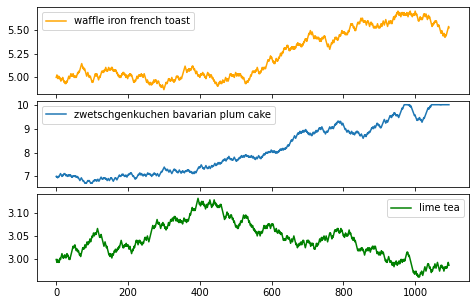

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.7, 1, 0.3])
ax2 = fig.add_axes([0.1, 0.375, 1, 0.3])
ax3 = fig.add_axes([0.1, 0.05, 1, 0.3])
rec1 = ax1.plot(data[0], 'orange', label='waffle iron french toast')
rec2 = ax2.plot(data[1], label='zwetschgenkuchen bavarian plum cake')
rec3 = ax3.plot(data[2], 'g', label='lime tea')
ax1.legend()
ax2.legend()
ax3.legend()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

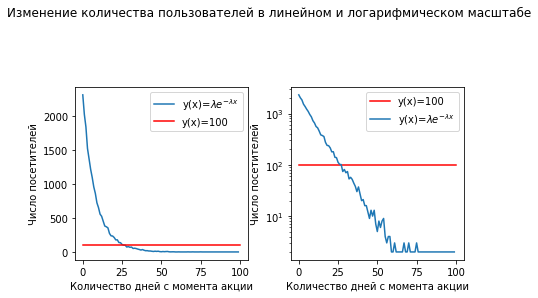

In [ ]:
visitors = np.load('/content/visitors.npy')
fig = plt.figure()
ax1 = fig.add_axes([0.05, 0.1, 0.4, 0.6])
ax2 = fig.add_axes([0.55, 0.1, 0.4, 0.6])
ax2.set_yscale('log')
gr1 = ax1.plot(visitors, label='y(x)=$\lambda$$e^{-\lambda x}$')
x1 = [0,100]
y1 = [100,100]
lin1 = ax1.plot(x1,y1,'r', label='y(x)=100')
lin2 = ax2.plot(x1,y1,'r',label='y(x)=100')
gr2 = ax2.plot(visitors, label='y(x)=$\lambda$$e^{-\lambda x}$')
ax1.legend()
ax2.legend()
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = pd.read_csv('/content/reviews_sample.csv')
recipes = pd.read_csv('/content/recipes_sample.csv')

In [ ]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [ ]:
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

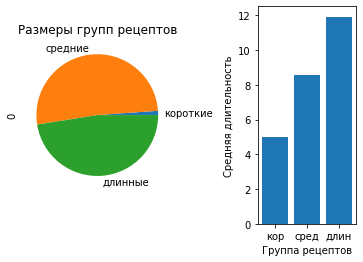

In [ ]:
group1 = recipes[recipes['minutes']<5]
group2 = recipes[(recipes['minutes']>=5) & (recipes['minutes']<50)]
group3 = recipes[recipes['minutes']>=50]
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,3,3)
#gr_ob = pd.merge(group1, group2, group3, on='n_steps')
pd1 = pd.DataFrame([group1['n_steps'].mean(),group2['n_steps'].mean(),group3['n_steps'].mean()])
pd2 = pd.DataFrame([group1['n_steps'].sum(),group2['n_steps'].sum(),group3['n_steps'].sum()])
graf1 = pd2.plot(kind='pie', subplots=True, ax=ax0, labels=['короткие', 'средние', 'длинные'])
graf2 = plt.bar(['кор', 'сред', 'длин'], pd1[0])
ax0.set_title('Размеры групп рецептов')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax0.get_legend().remove()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:52: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

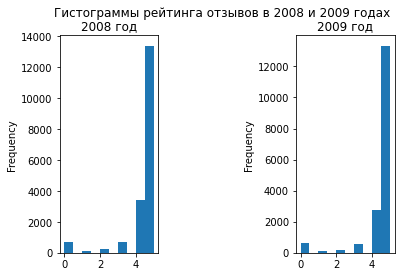

In [ ]:
reviews['date'] = pd.to_datetime(reviews['date'])
new_rev1 = reviews[(reviews['date']<='31-12-2008') & (reviews['date']>='01-01-2008')]
new_rev2 = reviews[(reviews['date']<='31-12-2009') & (reviews['date']>='01-01-2009')]

fig = plt.figure()
ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,3)
new_rev1['rating'].plot.hist(ax=ax0);
new_rev2['rating'].plot.hist(ax=ax1);
ax0.set_title('2008 год')
ax1.set_title('2009 год')
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<ipython-input-33-8b61c016f9e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['group'] = 'короткий'
<ipython-input-33-8b61c016f9e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2['group'] = 'средний'
<ipython-input-33-8b61c016f9e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

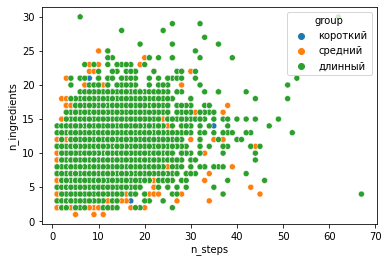

In [ ]:
group1['group'] = 'короткий'
group2['group'] = 'средний'
group3['group'] = 'длинный'
big_group = group1.append(group2).append(group3)
sns.scatterplot(data = big_group, x = "n_steps", y = "n_ingredients", hue='group'); 

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

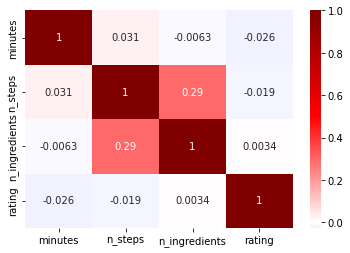

In [ ]:
new = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')[["minutes", "n_steps", "n_ingredients", "rating"]]
dataplot=sns.heatmap(new.corr(), cmap='seismic', center=0.0, annot = True)